#Homework 5 : Bert Zhao


**<span style="color: darkgreen">Due Friday May 1 at 11:59pm</span>**

**Instructions:** Make a copy of this notebook that you can edit and save. If you are using CoLab, that means clicking File>Save and then "SAVE A COPY IN DRIVE". Then, for each problem, insert your answers directly underneath the problem description as one or more `Code` or `Markdown` cells as appropriate. Every code cell should execute without errors. TAs and graders may not have resources to debug your code. When you are satisfied with your answers upload your notebook and a PDF to canvas. 

**Relevant Reading**

- Chapters 5 and 7.
- Converting a transfer function into state space is covered in Section 5.7. The book uses what are called Signal Flow Graphs", which I am avoiding. But you might find the book's discussion of these (which starts in Chapter 5) interesting.
- Sensitivity is covered in Section 7.7.
- The use of the final value theorem to analyze disturbances is covered in Section 7.5.

In [0]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
from sympy import *
import math
%matplotlib inline

def plot_phase_portrait(matrices,titles):
    """Makes a plot of the phase portraits of the given matrices"""
    fig, ax = plt.subplots(1, len(matrices), figsize=(5*len(matrices)+1,5),squeeze=False)
    x1,x2 = np.meshgrid(np.linspace(-1, 1, 9),np.linspace(-1, 1, 9))
    for i,[matrix,title] in enumerate(zip(matrices,titles)):
        a = np.array(matrix).astype(np.float64)
        x1dot = a[0,0]*x1 + a[0,1]*x2
        x2dot = a[1,0]*x1 + a[1,1]*x2
        if np.max(np.abs(np.array([x1dot,x2dot]).flatten()))==0:
          scale = 1
        else:
          scale = None
        ax[0,i].quiver(x1, x2, x1dot, x2dot, color='r',headlength=4,headaxislength=4,scale=scale)
        ax[0,i].set_xlabel('$x_1$')
        ax[0,i].set_ylabel('$x_2$')
        ax[0,i].set_title(title)
    return None

def find_Gs(A, B, C, D):

  s = symbols('s')
  II = eye(A.shape[0])
  Gs = C * (s * II - A).pinv() * B + D
  return simplify(Gs)

try: 
  import google.colab #test for colab
  import IPython
  def setup_typeset():
    """MathJax initialization for the current cell.
    
    This installs and configures MathJax for the current output.
    """
    IPython.display.display(IPython.display.HTML('''
        <script src="https://www.gstatic.com/external_hosted/mathjax/latest/MathJax.js?config=TeX-AMS_HTML-full,Safe&delayStartupUntil=configured"></script>
        <script>
          (() => {
            const mathjax = window.MathJax;
            mathjax.Hub.Config({
            'tex2jax': {
              'inlineMath': [['$', '$'], ['\\(', '\\)']],
              'displayMath': [['$$', '$$'], ['\\[', '\\]']],
              'processEscapes': true,
              'processEnvironments': true,
              'skipTags': ['script', 'noscript', 'style', 'textarea', 'code'],
              'displayAlign': 'center',
            },
            'HTML-CSS': {
              'styles': {'.MathJax_Display': {'margin': 0}},
              'linebreaks': {'automatic': true},
              // Disable to prevent OTF font loading, which aren't part of our
              // distribution.
              'imageFont': null,
            },
            'messageStyle': 'none'
          });
          mathjax.Hub.Configured();
        })();
        </script>
        '''))
  def custom_latex_printer(exp,**options):
      setup_typeset()
      return printing.latex(exp,**options)
  init_printing(use_latex="mathjax",latex_printer=custom_latex_printer)
except:
  init_printing(use_latex='mathjax')

All of the problems this week have to do with the following system

\begin{align}
\dot x_1 & = x_2(x_1+a) \\
\dot x_2 & = u + \sin x_1 - a x_2 \\
y & = x_1
\end{align}

where $a \approx 2$.

## 1. Linearization


Find a linear state space model of the system assuming ${\bf x} = 0$
and $u=0$. Is the system stable when $u=0$? Find the transfer function
corresponding to the state space model. Call this $G(s)$. This is the
plant for this homework.

We know that $\bf x = 0$ and $u=0$ is an equilibrium point for the system. We can find a matrix representing the linearized system through the following steps:

$$
A = 
\begin{pmatrix}
  \frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} \\
  \frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2}
\end{pmatrix}
=
\begin{pmatrix}
  x_2 & x_1+2 \\
  \cos(x_1) & -2
\end{pmatrix}_{(0, 0)}
=
\begin{pmatrix}
  0 & 2 \\
  1 & -2
\end{pmatrix}
$$

We can determine the eigenvalues of this matrix $A$ to be:

$$\lambda = -1 \pm \sqrt3$$

Because the eigenvalues are real distinct values with opposite signs, the system is marginally stable. Below is a phase portrait of the linearized system at $\bf x = 0$.

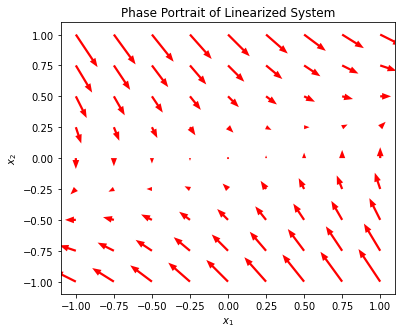

In [141]:
A1 = Matrix([[0, 2], [1, -2]])

plot_phase_portrait([A1], ["Phase Portrait of Linearized System"])

To fit the complete linearized model of the system represented by"

\begin{align}
\dot x & = A x + B u \\
y & = C x
\end{align}

Based on the system equations above, we can find matrices $B$, $C$, and $D$ by inspection to get:

$$
A =
\begin{pmatrix}
  0 & 2 \\
  1 & -2
\end{pmatrix}
$$

$$
B =
\begin{pmatrix}
  0 \\
  1
\end{pmatrix}
$$

$$
C =
\begin{pmatrix}
  1 & 0
\end{pmatrix}
$$

$$
D = (0)
$$

The transfer fucntion $G(s)$ can be found by:

$$G(s) = C(sI-A)^{-1} B + D$$

Solving with sympy, we get:

$$G(s) = \frac{2}{s^2+2s-2}$$

In [142]:
B1 = Matrix([[0], [1]])
C1 = Matrix(1, 2, [1, 0])
D1 = Matrix([0])

print('Part a: G(s) = ', find_Gs(A1, B1, C1, D1))

Part a: G(s) =  Matrix([[2/(s**2 + 2*s - 2)]])


## 2. Interconnections
 

Consider a controller of the form $G_c(s) = k_p + k_d s$ (this is called
*proportional-derivative* or PD control). Assume the following interconnection:

<img width=55% src="https://github.com/christakahashi/ECE447/blob/master/images/hw5-fig.png?raw=1">

Find the closed-loop transfer function $T(s) = Y(s)/R(s)$ (assuming
$D(s) = 0$ and $N(s) = 0$). Also find a state space model ($A$, $B$
and $C$ matrices) for the closed-loop system.

The transfer function can be solved through the following steps:

$$Y(s) = R(s)G_c(s)G(s)-Y(s)G_c(s)G(s)$$
$$Y(s)+Y(s)G_c(s)G(s)= R(s)G_c(s)G(s)$$
$$Y(s)(1+G_c(s)G(s))= R(s)G_c(s)G(s)$$
$$\frac{Y(s)}{R(s)} = \frac{G_c(s)G(s)}{1+G_c(s)G(s)}$$

In [143]:
kd, kp, s = symbols(['k_d', 'k_p', 's'])
a = 2
G = a/(s**2 + a*s - a)
Gc = kp + kd*s

T = (G * Gc) / (1 + G * Gc)
display(simplify(T))

        2⋅(k_d⋅s + kₚ)       
─────────────────────────────
                  2          
2⋅k_d⋅s + 2⋅kₚ + s  + 2⋅s - 2

We get that the transfer function of the whole system including both the PD control and the plant is:

$$T(s) = \frac{Y(s)}{R(s)} = \frac{2(k_ds+k_p)} {s^2+2k_ds+2s+2k_p-2}$$

We rearrange the transfer function so that we can use phase canonical form to get the state space metrices.

$$T(s) = \frac{Y(s)}{R(s)} = \frac{2k_ds+2k_p} {1s^2+2(k_d+1)s+2(k_p-1)}$$

Then we can use a placeholder signal to help take an inverse Laplace Transform and get the system into a space state form.

$$Y(s) = (2k_ds+2k_p) \cdot Z(s)$$
$$R(s) = (1s^2+2(k_d+1)s+2(k_p-1)) \cdot Z(s)$$

Inverse Laplace to get:

$$y(t) = \dot z \cdot 2k_d + z \cdot 2k_p$$
$$r(t) = \ddot z + \dot z \cdot 2(k_d+1) + z \cdot 2(k_p+1)$$

Substituting for $z$:

\begin{align}
x_1 & = z \\
x_2 & = \dot z  = \dot x_1
\end{align}

Rearrange $r(t)$:
$$\dot x_2 = -\dot z 2(k_d+1) - z 2(k_p+1) + r(t)$$

We get the complete set of equations for the system:

$$ \dot x_1 = x_2$$
$$ \dot x_2 = -\dot z \cdot 2(k_d+1) - z \cdot 2(k_p+1) + r(t)$$
$$ y = x_1 \cdot 2(k_p-1) + x_2 \cdot 2k_d$$

We can then see that the state space form of the system is:

$$ \dot x =
\begin{pmatrix}
  0 & 1 \\
  -2(k_p-1) & -2(k_d+1)
\end{pmatrix} x +
\begin{pmatrix}
  0 \\
  1
\end{pmatrix} r
$$

$$ y =
\begin{pmatrix}
  2k_p & 2k_d
\end{pmatrix} x
$$

Where matrices $A$, $B$, and $C$ are defined as follows:

$$ A =
\begin{pmatrix}
  0 & 1 \\
  -2(k_p-1) & -2(k_d+1)
\end{pmatrix}
$$
$$ B =
\begin{pmatrix}
  0 \\
  1
\end{pmatrix}
$$

$$ C =
\begin{pmatrix}
  2k_p & 2k_d
\end{pmatrix}
$$

## 3. Steady State Error
 

In terms of $k_p$ and $k_d$, find the steady state error of the
closed-loop system $T(s)$ when $R(s)$ is 

- (a) a unit impulse and 
- (b) a unit step input.

How should the gains $k_p$ and $k_d$ be chosen to
ensure that both of these errors are minimized?

In [144]:
display(simplify(1/(1+Gc*G)))

          2                  
         s  + 2⋅s - 2        
─────────────────────────────
                  2          
2⋅k_d⋅s + 2⋅kₚ + s  + 2⋅s - 2

We first need to find the error function of this system:

$$E(s) = R(s) - Y(s)$$

Since we know:

$$Y(s) = R(s)\frac{G_c(s)G(s)}{1+G_c(s)G(s)}$$

The error is:

$$E(s) = R(s) - R(s)\frac{G_c(s)G(s)}{1+G_c(s)G(s)}$$
$$E(s) = R(s) (1 - \frac{G_c(s)G(s)}{1+G_c(s)G(s)})$$

We can simplify with the system definitions for $G_c(s)$ and $G(s)$ to get:

$$E(s) = R(s) \frac{s^2+2s-2} {1s^2+2(k_d+1)s+2(k_p-1)}$$

We can then use the final value theorem to get an equation steady state error.

$$ e(\infty) = \lim_{s \rightarrow 0} sR(s) \frac{s^2+2s-2} {1s^2+2(k_d+1)s+2(k_p-1)}$$

##a)

For unit impulse, $R(s) = 1$ and we get from the SSE equation

$$ e(\infty) = \lim_{s \rightarrow 0} s \cdot 1 \frac{s^2+2s-2} {1s^2+2(k_d+1)s+2(k_p-1)} = 0$$

##b)

For unit step, $R(s) = \frac{1}{s}$ and we get from the SSE equation

$$ e(\infty) = \lim_{s \rightarrow 0} s \cdot \frac{1}{s} \frac{s^2+2s-2} {1s^2+2(k_d+1)s+2(k_p-1)} = \frac{-2}{2(k_p-1)}$$

The error can be minimized by increasing $k_p$.

## 4. Choosing Gains


Assuming the nominal value for $a$, find a relationship between $k_p$
and $k_d$ that ensures that the poles of $T(s)$ are both negative and
equal. Assuming $k_p = 5$, what value of $k_d$ makes both poles equal?

Given the transfer function, we can solve for the poles using the quadratic formula.

$$T(s) = \frac{Y(s)}{R(s)} = \frac{2k_ds+2k_p} {s^2+2(k_d+1)s+2(k_p-1)}$$

The poles are:

$$s = \frac{-2(k_d+1) \pm \sqrt{4(k_d+1)^2-8(k_p-1)}}{2}$$
$$s = -(k_d+1) \pm \sqrt{(k_d+1)^2-2(k_p-1)}$$

The only way for both poles to be the same and negative is if:

$$ \sqrt{(k_d+1)^2-2(k_p-1)} = 0$$

so that both poles can be $-(k_d+1)$ which are negative.

We can then solve $ \sqrt{(k_d+1)^2-2(k_p-1)} = 0$ to determine the relationship between $k_d$ and $k_p$ in order for both poles to be equal.

$$ \sqrt{(k_d+1)^2-2(k_p-1)} = 0$$
$$ (k_d+1)^2 = 2(k_p-1)$$
$$ (k_d+1) = \sqrt{2(k_p-1)}$$
$$ k_d = \sqrt{2(k_p-1)} - 1$$

If $k_p = 5$, then $k_d = 2\sqrt{2} - 1$ so that both poles are equal to $-2\sqrt2$.

## 5. Sensitivity


Find the sensitivities $S^G_a$. Plot the magnitudes of these
sensitivities for $s=j \omega$ as a function of $\omega$. For what
values of $\omega$ is the sensitivities less than $0.5$? Repeat the
question for $S^T_a$ using the values for $k_p$ and $k_d$ you found in
problem (4). How does changing the gains affect the sensitivity?

To find the sensitivity, $S^G_a$, we can use the formula:

$$S^G_a(s) = \frac{\partial G(s)}{\partial a} \cdot \frac{a}{G(s)}$$

$$S^G_a(s) = \frac{s^2}{(s^2+as-a)^2} \cdot \frac {a(s^2+as-a)}{a}$$

$$S^G_a(s) = \frac{s^2}{(s^2+as-a)}$$

We can make the substitution for $s=j \omega$ and $a=2$ and then plot the magnitude of sensitivity as a function of $\omega$.

$$S^G_a(j\omega) = \frac{-\omega^2}{(-\omega^2+2j\omega-2)}$$

We can repeat the steps to find the sensitivity of the overall transfer function, $S^T_a$.

$$S^T_a(s) = \frac{\partial T(s)}{\partial a} \cdot \frac{a}{T(s)}$$

$$S^T_a(s) = \frac{s^2(k_d+k_p)}{(as+a(k_ds+k_p)-a+s^2)^2} \cdot \frac {a(as+a(k_ds+k_p)-a+s^2)}{a(k_d+k_p)}$$

$$S^T_a(s) = \frac{s^2}{as+a(k_ds+k_p)-a+s^2}$$

We can make the substitution for $s=j \omega$, $a=2$, $k_d = 2\sqrt2$, and $k_p = 5$ and then plot the magnitude of sensitivity as a function of $\omega$.

$$S^T_a(j\omega) = \frac{-\omega^2}{-\omega^2+4\sqrt2j\omega+8}$$

Text(0.5, 1.0, 'Sensitivity of Plant and Gain Controller')

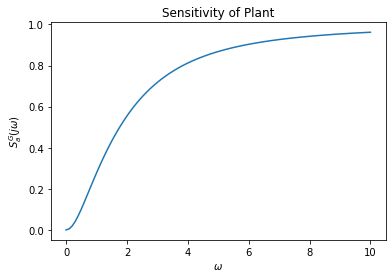

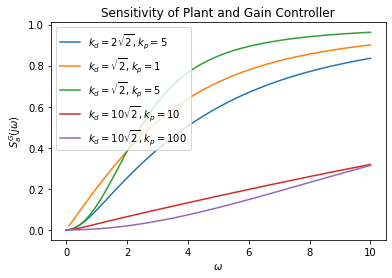

In [145]:
omega = np.linspace(0, 10, 100)
a = 2
SG = -omega**2 / (-omega**2 + a * 1j * omega - a)
plt.figure(1)
plt.plot(omega, abs(SG))
plt.xlabel('$\omega$')
plt.ylabel('$S^G_a(j\omega)$')
plt.title('Sensitivity of Plant')

kd = 2 * sqrt(2)
kp = 5
ST1 = -omega**2 / (a*1j*omega + a*(kd*1j*omega+kp) - a - omega**2)

kd = 1 * sqrt(2)
kp = 1
ST2 = -omega**2 / (a*1j*omega + a*(kd*1j*omega+kp) - a - omega**2)

kd = 1 * sqrt(2)
kp = 5
ST3 = -omega**2 / (a*1j*omega + a*(kd*1j*omega+kp) - a - omega**2)

kd = 10 * sqrt(2)
kp = 10
ST4 = -omega**2 / (a*1j*omega + a*(kd*1j*omega+kp) - a - omega**2)

kd = 10 * sqrt(2)
kp = 100
ST5 = -omega**2 / (a*1j*omega + a*(kd*1j*omega+kp) - a - omega**2)

plt.figure(2)
plt.plot(omega, abs(ST1), label='$k_d = 2\sqrt{2}, k_p = 5$')
plt.plot(omega, abs(ST2), label='$k_d = \sqrt{2}, k_p = 1$')
plt.plot(omega, abs(ST3), label='$k_d = \sqrt{2}, k_p = 5$')
plt.plot(omega, abs(ST4), label='$k_d = 10\sqrt{2}, k_p = 10$')
plt.plot(omega, abs(ST5), label='$k_d = 10\sqrt{2}, k_p = 100$')
plt.legend()
plt.xlabel('$\omega$')
plt.ylabel('$S^G_a(j\omega)$')
plt.title('Sensitivity of Plant and Gain Controller')

## 6. Disturbances and Noise


Let $R(s)=0$, $N(s)=0$ and $D(s) = d/s$ is a step disturbance of
magnitude $d$. What is the effect of $d$ on the steady state error? Do
the same thing assuming $R(s)=0$, $N(s)=n/s$ and $D(s)=0$.

With the following conditions, $R(s)=0$, $N(s)=0$ and $D(s) = d/s$, we can get the path from $D$(s) to $Y(s)$ to be represented by this equation:

$$Y(s) = -(Y(s)+D(s))G_c(s)G(s)$$

We also know the error, $E(s)$, to be:

$$E(s) = R(s) - Y(s)$$
$$E(s) = 0 - Y(s)$$
$$E(s) = - Y(s)$$

Therefore we can solve for $Y(s)$ to find the steady state error.

$$Y(s) = -Y(s)G_c(s)G(s)-D(s)G_c(s)G(s)$$
$$Y(s)+Y(s)G_c(s)G(s) = -D(s)G_c(s)G(s)$$
$$Y(s)(1+G_c(s)G(s)) = -D(s)G_c(s)G(s)$$
$$E(s) = -Y(s) = \frac{D(s)G_c(s)G(s)}{1+G_c(s)G(s)}$$

Note that $\frac{G_c(s)G(s)}{1+G_c(s)G(s)}$ is equal to the transfer function, $T(s)$. We can find the steady state error by using the final value theorem to find $e(\infty)$.

$$e(\infty) = \lim_{s \rightarrow 0} s \cdot \frac{D(s)G_c(s)G(s)}{1+G_c(s)G(s)}$$

And we can substitute $D(s) = \frac{d}{s}$ to get:

$$e(\infty) = \lim_{s \rightarrow 0} s \cdot \frac{d}{s}\frac{G_c(s)G(s)}{1+G_c(s)G(s)}$$
$$e(\infty) = \lim_{s \rightarrow 0} d \frac{G_c(s)G(s)}{1+G_c(s)G(s)}$$

This means that the steady state error is directly proportional to the transfer function, $T(s)$, multiplied my the magnitude of the disturbance, $d$. This makes sense because the disturbance passes through both the PD controller and the plant to get to the output.

We can repeat the analysis with new conditions: $R(s)=0$, $N(s)=n/s$ and $D(s)=0$. The path from $N(s)$ to $Y(s)$ is represented by this equation:

$$Y(s) = (-Y(s)G_c(s) + N(s))G(s)$$

The error, $E(s)$, is the same as the previous part:

$$E(s) = R(s) - Y(s)$$
$$E(s) = 0 - Y(s)$$
$$E(s) = - Y(s)$$

And again we solve for $Y(s)$ to find the error.

$$Y(s) = -Y(s)G_c(s)G(s) + N(s)G(s)$$
$$Y(s)+Y(s)G_c(s)G(s) = N(s)G(s)$$
$$Y(s)(1+G_c(s)G(s)) = N(s)G(s)$$
$$E(s) = -Y(s) = \frac{-N(s)G(s)}{1+G_c(s)G(s)}$$

Note that now $\frac{G(s)}{1+G_c(s)G(s)}$ is not the whole transfer function anymore. Only gain of the plant is proportional to the error. We can find the steady state error by using the final value theorem to find $e(\infty)$.

$$e(\infty) = \lim_{s \rightarrow 0} s \cdot \frac{-N(s)G(s)}{1+G_c(s)G(s)}$$

And we can substitute $N(s) = \frac{n}{s}$ to get:

$$e(\infty) = \lim_{s \rightarrow 0} s \cdot \frac{-n}{s}\frac{G(s)}{1+G_c(s)G(s)}$$
$$e(\infty) = \lim_{s \rightarrow 0} -n\frac{G(s)}{1+G_c(s)G(s)}$$

This means that the steady state error is only proportional to the gain of the plant, $G(s)$, multiplied by the magnitude of noise, $n$, and not the PD controller, $G_c(s)$. This makes sense because the noise only passes through the plant, and not the PD controller, to get to the output.

## 7. Simulation
 

Generate the following plots of the closed
loop system using the the gains found in problem (4) and assuming a
unit step input. 
- (a) The response when $N(s) = D(s) = 0$ and $a=2$. 
- (b) The response when $N(s)=1/s$, $D(s)=0$ and $a=2$.
- (c) The response when $N(s)=0$, $D(s)=0.1/s$ and $a=2$.
- (d) The response when $N(s) = D(s) = 0$ and $a$ is 50\% greater
than its nominal value.

Do the simulations agree with your analysis in the previous problems?
What do the simulations tell you that you analysis does not?

Given each of these conditions, we can find a generic $Y(s)$ for each system and then apply the inverse Laplace Transform.

For 7a and 7d, only difference being that $a=2$ for 7a and $a=3$ for 7d:

$$Y(s) = \frac{1}{s} \cdot \frac{G_c(s)G(s)}{1+G_c(s)G(s)}$$

For 7b:

$$Y(s) = \frac{1}{s} \cdot \frac{G(s)(G_c(s)+1)}{1+G_c(s)G(s)}$$

For 7c:

$$Y(s) = \frac{0.9}{s} \cdot \frac{G_c(s)G(s)}{1+G_c(s)G(s)}$$

Based on the plots, we can clearly see how noise and disturbance effects the response of the system. Based on the error analysis of previous problems, we can see how the error can cause the response to be greater or less than the ideal response. We know this to be true because in the last problem, we found that disturbance caused positive error while noise caused negative error. (Note that due to the typo in the diagram compared to the lecture diagram, the plot might show the reverse case.) The simulation in the time domain lets us more easily view the response. In the previous analysis questions, it is often more difficult to truly visualize what is happening in the frequency domain.


In [0]:
var("a", real=True)
var("t", real=True,positive=True)
var("s")

kd = 3
kp = 5
a = 2

# controller and plant

G = a/(s**2 + a*s - a)
Gc = kp + kd*s

#7a

Y1 = (1/s) * (G * Gc) / (1 + G * Gc)
Y1 = Y1.cancel()

# 7b

Y2 = (1/s) * G * (Gc + 1) / (1 + Gc*G)
Y2 = Y2.cancel()

# 7c

Y3 = (9/(s*10)) * (G * Gc) / (1 + G * Gc)
Y3 = Y3.cancel()

# 7d

a = 3
G = a/(s**2 + a*s - a)
Gc = kp + kd*s

Y4 = (1/s) * (G * Gc) / (1 + G * Gc)
Y4 = Y4.cancel()

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


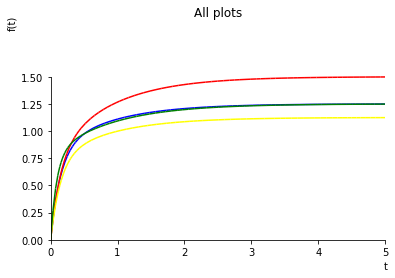

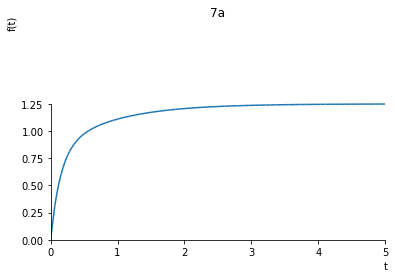

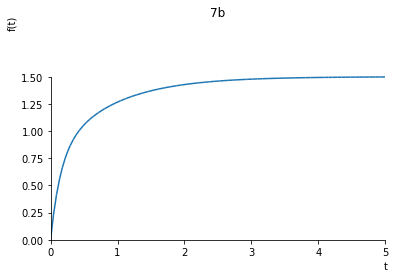

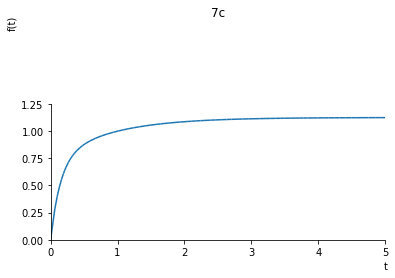

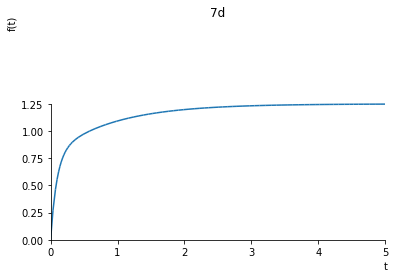

In [147]:
# Find solutions in time domain for each y
y1 = inverse_laplace_transform(Y1, s, t)
y2 = inverse_laplace_transform(Y2, s, t)
y3 = inverse_laplace_transform(Y3, s, t)
y4 = inverse_laplace_transform(Y4, s, t)

# All plots
plots = plotting.plot(y1,y2,y3,y4,(t,0,5),ylim=(0,2), show=false, title='All plots');
plots[0].line_color = 'blue' #7a
plots[1].line_color = 'red' #7b
plots[2].line_color = 'yellow' #7c
plots[3].line_color = 'green' #7d
plots.show()

# Individual plots
plotting.plot(y1,(t,0,5),ylim=(0,2), title='7a');
plotting.plot(y2,(t,0,5),ylim=(0,2), title='7b');
plotting.plot(y3,(t,0,5),ylim=(0,2), title='7c');
plotting.plot(y4,(t,0,5),ylim=(0,2), title='7d');